In [1]:
import os, re, cv2
import matplotlib.pyplot as plt
import numpy as np

from utils.defisheye import Defisheye
from utils.surround_view import convert_bird_eye_view
from tqdm.notebook import tqdm

In [2]:
img_pos = {'front': [[0, 540], [0, 960]],
           'rear':[[0, 540], [960, 1980]],
           'left': [[540, 1080], [0, 960]],
           'right':[[540, 1080], [960, 1980]]}

In [3]:
file_list = os.listdir("e:\\result")
file_list = sorted(file_list, key=lambda x: int(re.search(r'\d+', x).group()))

In [4]:
img_list = []

for file in tqdm(file_list[30:230]):
    img = cv2.imread(f"e:\\result\\{file}")
    img_list.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

  0%|          | 0/200 [00:00<?, ?it/s]

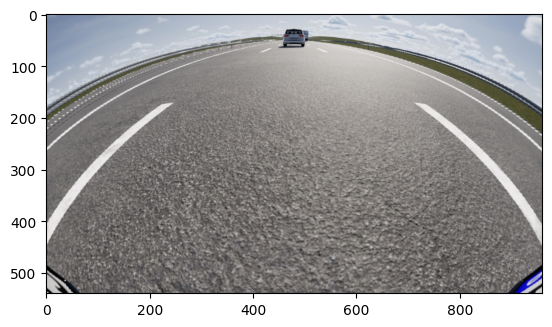

In [7]:
idx = 30
front_img = img_list[idx][img_pos['front'][0][0]:img_pos['front'][0][1], img_pos['front'][1][0]:img_pos['front'][1][1]]
rear_img = img_list[idx][img_pos['rear'][0][0]:img_pos['rear'][0][1], img_pos['rear'][1][0]:img_pos['rear'][1][1]]
left_img = img_list[idx][img_pos['left'][0][0]:img_pos['left'][0][1], img_pos['left'][1][0]:img_pos['left'][1][1]]
right_img = img_list[idx][img_pos['right'][0][0]:img_pos['right'][0][1], img_pos['right'][1][0]:img_pos['right'][1][1]]

plt.imshow(front_img)

In [8]:
defisheye = Defisheye(front_img, dtype='equalarea', format='fullframe', fov=360, pfov=120, pad=270)

In [35]:
result = defisheye.convert(front_img)[150:930]
result.shape

(780, 1080, 3)

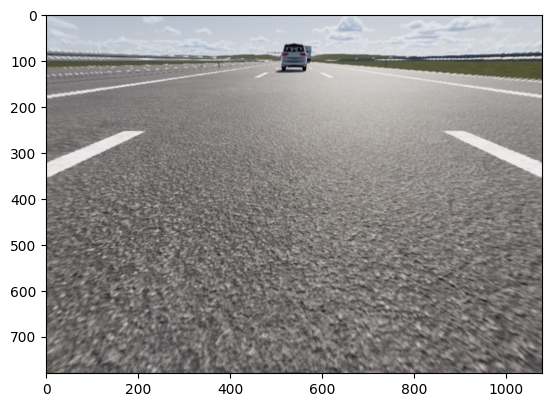

In [36]:
plt.imshow(result)

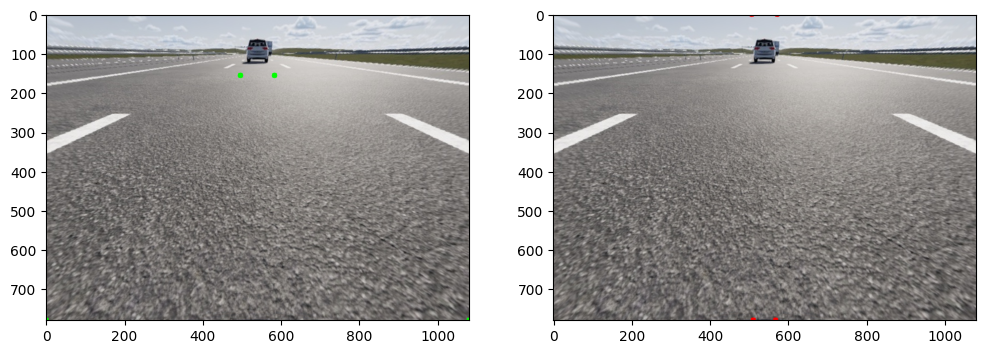

In [44]:
h, w, c = result.shape

src_h_ratio = 0.2
src_w_ratio_offset = 0.04

dst_h_offset_ratio = 0.01
dst_h_ratio = 0
dst_w1_ratio = 0.03
dst_w2_ratio = 0.026

src_pts = np.array([[w * (0.5-src_w_ratio_offset), h * src_h_ratio], [w * (0.5+src_w_ratio_offset), h * src_h_ratio], [w, h], [0, h]], dtype=np.float32)
dst_pts = np.array([[w*(0.5-dst_w1_ratio), h*dst_h_ratio], [w*(0.5+dst_w1_ratio), h*dst_h_ratio], [w*(0.5+dst_w2_ratio), h], [w*(0.5-dst_w2_ratio), h]], dtype=np.float32)

result_img_copy_1 = result.copy()
result_img_copy_2 = result.copy()

for pos in src_pts:
    pos = pos.astype(np.int32)
    cv2.circle(img=result_img_copy_1, center=pos, radius=2, color=(0, 255, 0), thickness=10)

for pos in dst_pts:
    pos = pos.astype(np.int32)
    cv2.circle(img=result_img_copy_2, center=pos, radius=2, color=(255, 0, 0), thickness=10)

fig, axis = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 5)
axis[0].imshow(result_img_copy_1)
axis[1].imshow(result_img_copy_2)

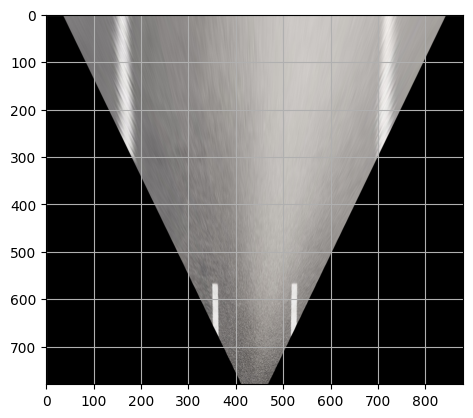

In [45]:
m = cv2.getPerspectiveTransform(src_pts, dst_pts)
dst_img = cv2.warpPerspective(src=result, M=m, dsize=(w, h), flags=cv2.INTER_LINEAR, borderValue=(0, 0, 0))

#plt.figure(figsize=(5, 5))
plt.grid()
plt.imshow(dst_img[:, 100:980])

np.save("parameter\\fish_eye_img\\front_img_cal.npy", m)

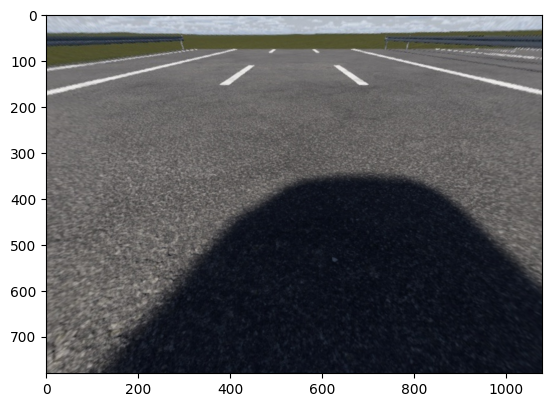

In [15]:
result = defisheye.convert(rear_img)[150:930]
plt.imshow(result)

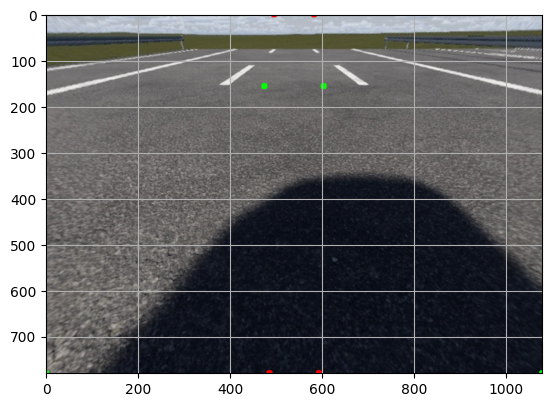

In [16]:
h, w, c = result.shape

src_h_ratio = 0.2
src_w_ratio_offset = 0.06

dst_h_offset_ratio = 0.01
dst_h_ratio = 0.0
dst_w1_ratio = 0.04
dst_w2_ratio = 0.05

src_pts = np.array([[w * (0.5-src_w_ratio_offset), h * src_h_ratio], [w * (0.5+src_w_ratio_offset), h * src_h_ratio], [w, h], [0, h]], dtype=np.float32)
dst_pts = np.array([[w*(0.5-dst_w1_ratio), h*dst_h_ratio], [w*(0.5+dst_w1_ratio), h*dst_h_ratio], [w*(0.5+dst_w2_ratio), h], [w*(0.5-dst_w2_ratio), h]], dtype=np.float32)

result_img_copy = result.copy()

for pos in src_pts:
    pos = pos.astype(np.int32)
    cv2.circle(img=result_img_copy, center=pos, radius=2, color=(0, 255, 0), thickness=10)

for pos in dst_pts:
    pos = pos.astype(np.int32)
    cv2.circle(img=result_img_copy, center=pos, radius=2, color=(255, 0, 0), thickness=10)

plt.imshow(result_img_copy)
plt.grid(True)

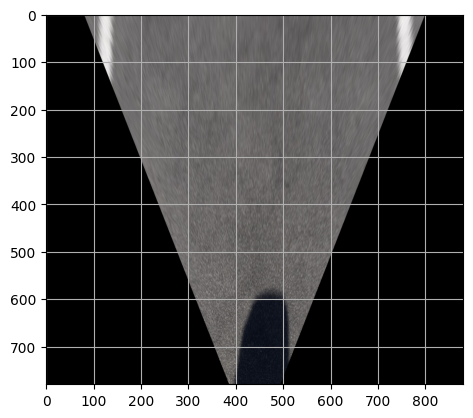

In [18]:
m = cv2.getPerspectiveTransform(src_pts, dst_pts)
dst_img = cv2.warpPerspective(src=result, M=m, dsize=(w, h), flags=cv2.INTER_LINEAR, borderValue=(0, 0, 0))

#plt.figure(figsize=(10, 10))
plt.grid()
plt.imshow(dst_img[:, 100:980])

np.save("parameter\\fish_eye_img\\rear_img_cal.npy", m)

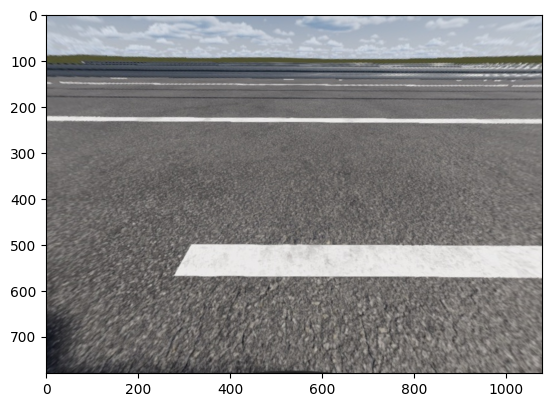

In [26]:
result = defisheye.convert(left_img)[150:930]
plt.imshow(result)

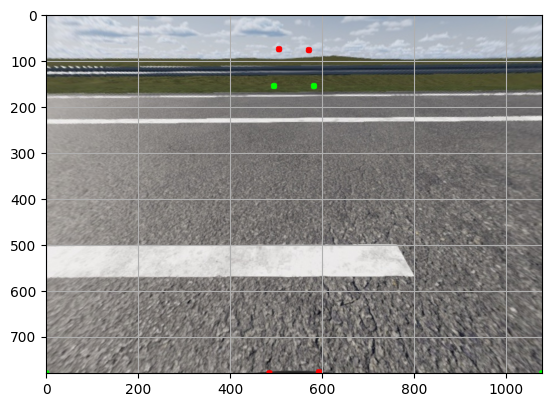

In [74]:
h, w, c = result.shape

src_h_ratio = 0.20
src_w_ratio_offset = 0.04

dst_h_offset_ratio = 0
dst_h_ratio = 0.1
dst_w1_ratio = 0.03
dst_w2_ratio = 0.05

src_pts = np.array([[w * (0.5-src_w_ratio_offset), h * src_h_ratio], [w * (0.5+src_w_ratio_offset), h * src_h_ratio], [w, h], [0, h]], dtype=np.float32)
dst_pts = np.array([[w*(0.5-dst_w1_ratio), h*dst_h_ratio-2], [w*(0.5+dst_w1_ratio), h*dst_h_ratio], [w*(0.5+dst_w2_ratio), h-2], [w*(0.5-dst_w2_ratio), h]], dtype=np.float32)

result_img_copy = result.copy()

for pos in src_pts:
    pos = pos.astype(np.int32)
    cv2.circle(img=result_img_copy, center=pos, radius=2, color=(0, 255, 0), thickness=10)

for pos in dst_pts:
    pos = pos.astype(np.int32)
    cv2.circle(img=result_img_copy, center=pos, radius=2, color=(255, 0, 0), thickness=10)

plt.imshow(result_img_copy)
plt.grid(True)

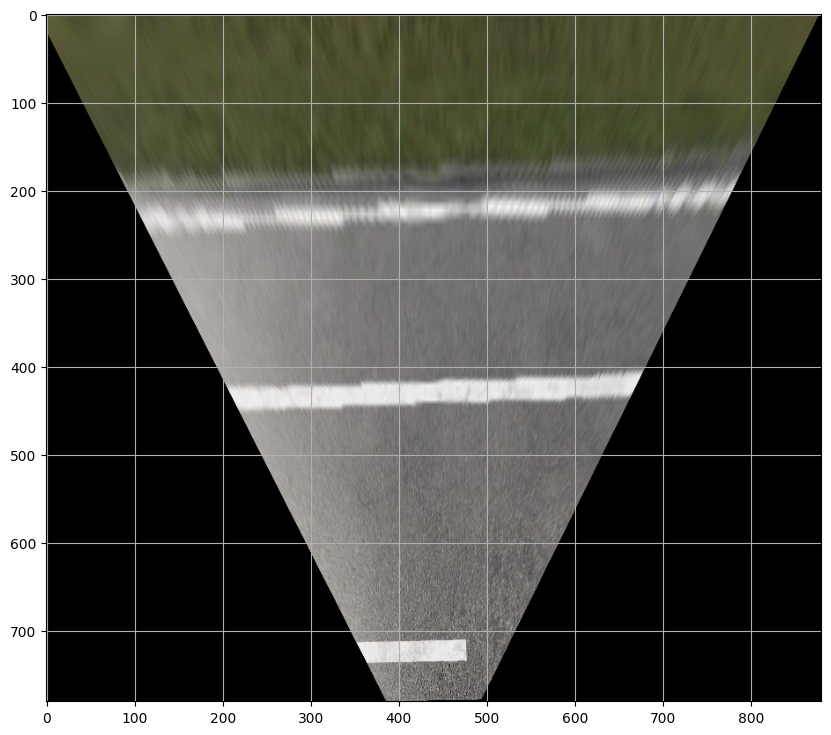

In [75]:
m = cv2.getPerspectiveTransform(src_pts, dst_pts)
dst_img = cv2.warpPerspective(src=result, M=m, dsize=(w, h), flags=cv2.INTER_LINEAR, borderValue=(0, 0, 0))

plt.figure(figsize=(10, 10))
plt.grid()
plt.imshow(dst_img[:, 100:980])

np.save("parameter\\fish_eye_img\\left_img_cal.npy", m)

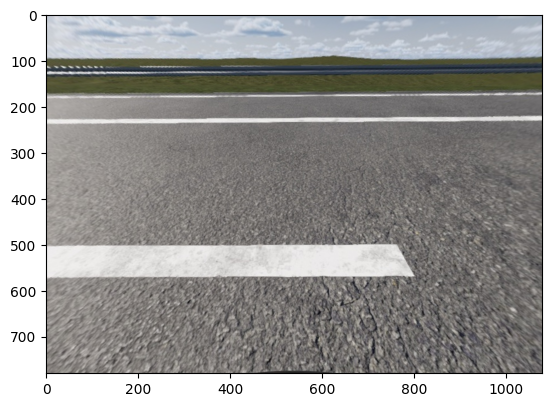

In [64]:
result = defisheye.convert(right_img)[150:930]
plt.imshow(result)

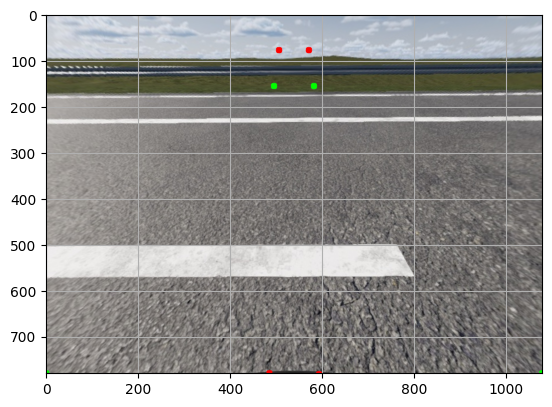

In [65]:
h, w, c = result.shape

src_h_ratio = 0.20
src_w_ratio_offset = 0.04

dst_h_offset_ratio = 0
dst_h_ratio = 0.1
dst_w1_ratio = 0.03
dst_w2_ratio = 0.05

src_pts = np.array([[w * (0.5-src_w_ratio_offset), h * src_h_ratio], [w * (0.5+src_w_ratio_offset), h * src_h_ratio], [w, h], [0, h]], dtype=np.float32)
dst_pts = np.array([[w*(0.5-dst_w1_ratio), h*dst_h_ratio], [w*(0.5+dst_w1_ratio), h*dst_h_ratio], [w*(0.5+dst_w2_ratio), h+2], [w*(0.5-dst_w2_ratio), h]], dtype=np.float32)

result_img_copy = result.copy()

for pos in src_pts:
    pos = pos.astype(np.int32)
    cv2.circle(img=result_img_copy, center=pos, radius=2, color=(0, 255, 0), thickness=10)

for pos in dst_pts:
    pos = pos.astype(np.int32)
    cv2.circle(img=result_img_copy, center=pos, radius=2, color=(255, 0, 0), thickness=10)

plt.imshow(result_img_copy)
plt.grid(True)

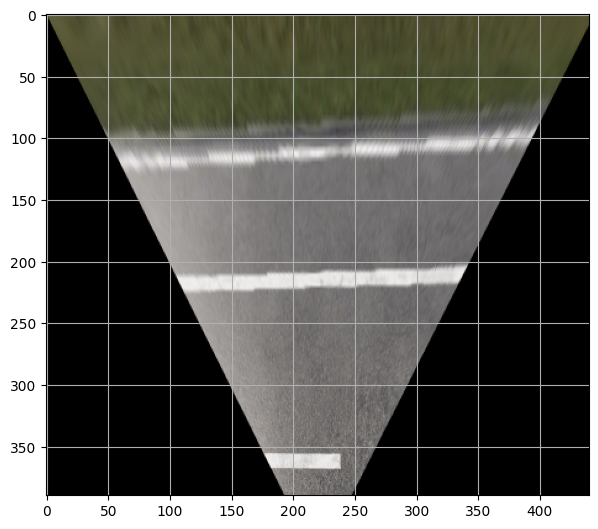

In [73]:
m = cv2.getPerspectiveTransform(src_pts, dst_pts)
dst_img = cv2.warpPerspective(src=result, M=m, dsize=(w, h), flags=cv2.INTER_LINEAR, borderValue=(0, 0, 0))[:, 100:980]
dst_img = cv2.resize(dst_img, fx=0.5, fy=0.5, dsize=(0, 0), interpolation=cv2.INTER_AREA)

plt.figure(figsize=(7, 7))
plt.grid()
plt.imshow(dst_img)

np.save("parameter\\fish_eye_img\\right_img_cal.npy", m)

In [2]:
front_cal = np.load("parameter\\fish_eye_img\\front_img_cal.npy")
rear_cal = np.load("parameter\\fish_eye_img\\rear_img_cal.npy")
left_cal = np.load("parameter\\fish_eye_img\\left_img_cal.npy")
right_cal = np.load("parameter\\fish_eye_img\\right_img_cal.npy")

NameError: name 'np' is not defined